<a href="https://colab.research.google.com/github/Abhishekcq/trial/blob/main/engine_replacement_pridiction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
sns.set_style('darkgrid')

In [5]:
df=pd.read_csv('/content/bus1234.csv')

In [6]:
df

,Unnamed: 0,id,group,year,month,replace,miles
0,0,144.0,50.0,1981.0,5.0,0.0,2208.0
1,1,144.0,50.0,1981.0,6.0,0.0,5418.0
2,2,144.0,50.0,1981.0,7.0,0.0,8547.0
3,3,144.0,50.0,1981.0,8.0,0.0,11566.0
4,4,144.0,50.0,1981.0,9.0,0.0,15890.0
...,...,...,...,...,...,...,...
8255,8255,95.0,530875.0,1985.0,1.0,0.0,342004.0
8256,8256,95.0,530875.0,1985.0,2.0,0.0,343654.0
8257,8257,95.0,530875.0,1985.0,3.0,0.0,345631.0
8258,8258,95.0,530875.0,1985.0,4.0,0.0,347549.0


In [7]:
df.shape

(8260, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8260 entries, 0 to 8259
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8260 non-null   int64  
 1   id          8260 non-null   float64
 2   group       8260 non-null   float64
 3   year        8260 non-null   float64
 4   month       8260 non-null   float64
 5   replace     8260 non-null   float64
 6   miles       8260 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 451.8 KB


In [9]:
df.describe

<bound method NDFrame.describe of       Unnamed: 0     id     group    year  month  replace     miles
0              0  144.0      50.0  1981.0    5.0      0.0    2208.0
1              1  144.0      50.0  1981.0    6.0      0.0    5418.0
2              2  144.0      50.0  1981.0    7.0      0.0    8547.0
3              3  144.0      50.0  1981.0    8.0      0.0   11566.0
4              4  144.0      50.0  1981.0    9.0      0.0   15890.0
...          ...    ...       ...     ...    ...      ...       ...
8255        8255   95.0  530875.0  1985.0    1.0      0.0  342004.0
8256        8256   95.0  530875.0  1985.0    2.0      0.0  343654.0
8257        8257   95.0  530875.0  1985.0    3.0      0.0  345631.0
8258        8258   95.0  530875.0  1985.0    4.0      0.0  347549.0
8259        8259   95.0  530875.0  1985.0    5.0      0.0  347549.0

[8260 rows x 7 columns]>

**EDA**

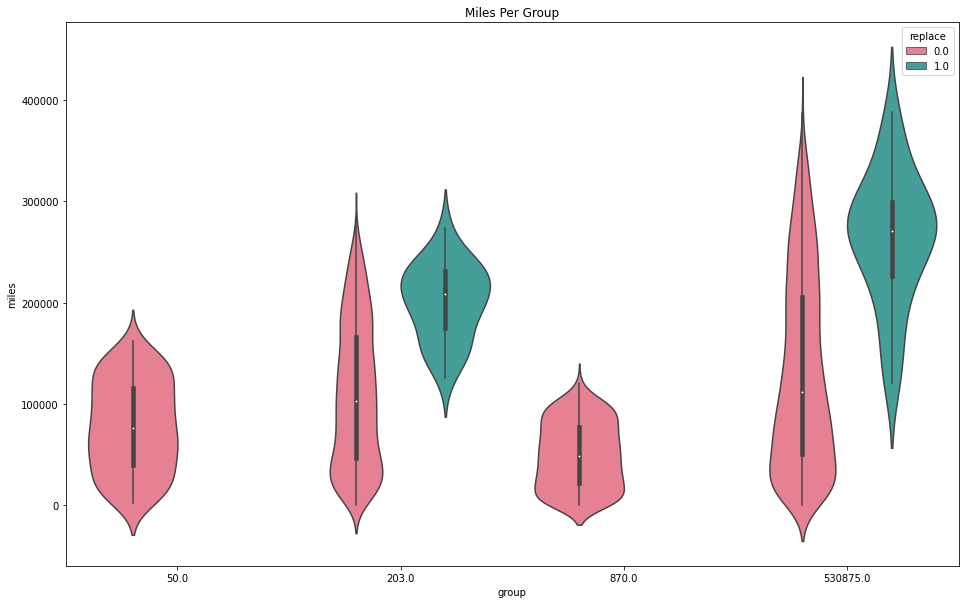

In [13]:
plt.figure(figsize=(16, 10))
sns.violinplot(x=df['group'], y=df['miles'], hue=df['replace'], palette='husl')
plt.title("Miles Per Group")
plt.show()

<Figure size 1152x720 with 0 Axes>

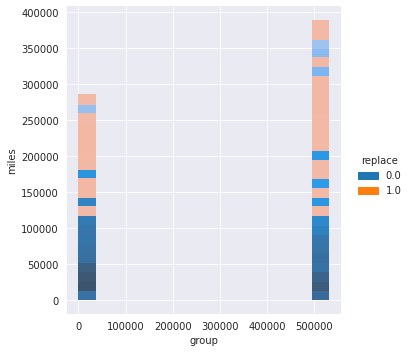

In [22]:
plt.figure(figsize=(16, 10))
sns.displot(x=df['group'], y=df['miles'],hue=df['replace'])

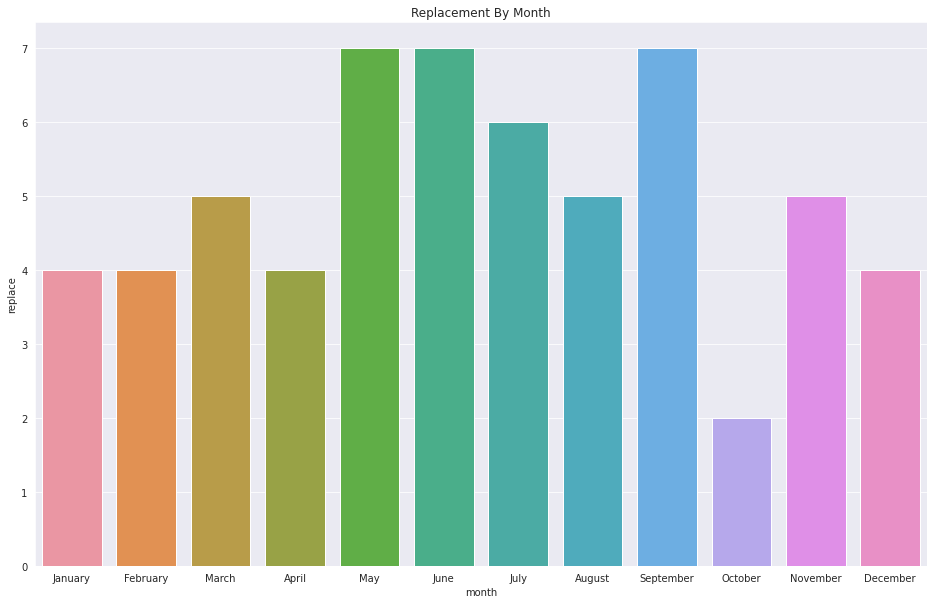

In [25]:
plt.figure(figsize=(16, 10))
sns.barplot(x=df['month'], y=df.groupby(by='month').sum()['replace'])
plt.xticks(
    ticks=np.arange(12),
    labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)
plt.title("Replacement By Month")
plt.show()

Preprocessing

In [35]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [30]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop the index columns
    df = df.drop(['Unnamed: 0'], axis=1)
    
    # One-hot encoding
    for column in ['id', 'group']:
        df = onehot_encode(df, column)
    
    # Split df into X and y
    y = df['replace']
    X = df.drop('replace', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    
    
    return X_train, X_test, y_train, y_test

In [32]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [33]:
X_train

,year,month,miles,id_59.0,id_60.0,id_61.0,id_62.0,id_63.0,id_64.0,id_65.0,id_66.0,id_67.0,id_68.0,id_69.0,id_70.0,id_71.0,id_72.0,id_73.0,id_74.0,id_75.0,id_76.0,id_77.0,id_78.0,id_79.0,id_80.0,id_81.0,id_82.0,id_83.0,id_84.0,id_85.0,id_86.0,id_87.0,id_88.0,id_89.0,id_90.0,id_91.0,id_92.0,id_93.0,id_94.0,id_95.0,...,id_127.0,id_128.0,id_129.0,id_130.0,id_131.0,id_132.0,id_133.0,id_134.0,id_135.0,id_136.0,id_137.0,id_138.0,id_139.0,id_140.0,id_141.0,id_142.0,id_143.0,id_144.0,id_145.0,id_146.0,id_147.0,id_148.0,id_149.0,id_150.0,id_151.0,id_152.0,id_153.0,id_154.0,id_155.0,id_156.0,id_157.0,id_158.0,id_159.0,id_160.0,id_161.0,id_162.0,group_50.0,group_203.0,group_870.0,group_530875.0
5829,1977.0,11.0,114367.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4995,1976.0,8.0,60494.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3600,1984.0,12.0,76750.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8009,1984.0,1.0,329774.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7525,1982.0,9.0,287751.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,1982.0,11.0,6057.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7813,1977.0,6.0,57410.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
905,1980.0,5.0,41280.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5192,1983.0,4.0,69653.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [34]:
y_train.value_counts()

0.0    5739
1.0      43
Name: replace, dtype: int64

**training**

In [38]:
model = LogisticRegression(
    class_weight={
        0: 1.0,
        1: 10.0
    }
)
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1.0, 1: 10.0})

In [39]:
print("Test Accuracy: {:.2f}%".format(model.score(X_test, y_test) * 100))

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No Replacement', 'Replacement']))

Test Accuracy: 98.51%
                precision    recall  f1-score   support

No Replacement       0.99      0.99      0.99      2461
   Replacement       0.05      0.06      0.05        17

      accuracy                           0.99      2478
     macro avg       0.52      0.53      0.52      2478
  weighted avg       0.99      0.99      0.99      2478



In [ ]:
model fail due to less data in Replacement class 